        date  Ex_rate
0 1990-01-01   0.7855
1 1990-01-02   0.7818
2 1990-01-03   0.7867
3 1990-01-04   0.7860
4 1990-01-05   0.7849
Index(['date', 'Ex_rate'], dtype='object')
Ex_rate    0
dtype: int64


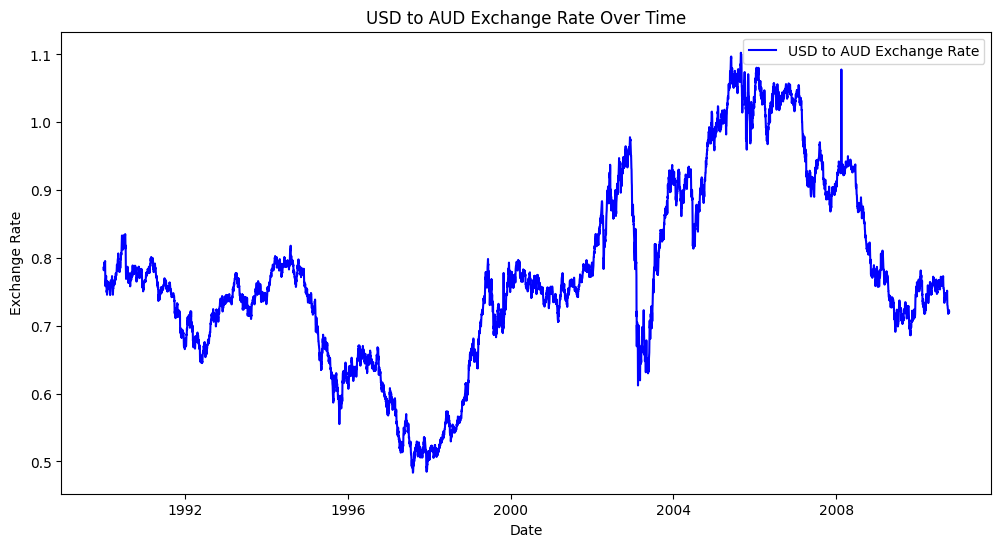

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset
try:
    # Load the dataset with correct date format
    data = pd.read_csv("/content/exchange_rate.csv", parse_dates=['date'], dayfirst=True)

    # Check the first few rows and column names
    print(data.head())
    print(data.columns)  # Display column names to confirm

    # Set 'date' as the index
    data.set_index('date', inplace=True)

except Exception as e:
    print(f"Error loading the CSV file: {e}")

# Step 2: Check for missing values
print(data.isnull().sum())  # Check for missing values
data.ffill(inplace=True)  # Forward fill for missing values

# Initial exploration: Plotting the time series
plt.figure(figsize=(12, 6))
plt.plot(data['Ex_rate'], label='USD to AUD Exchange Rate', color='blue')
plt.title('USD to AUD Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


<Figure size 1200x600 with 0 Axes>

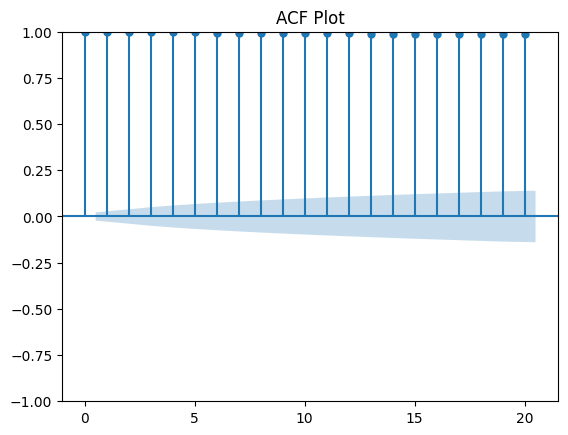

<Figure size 1200x600 with 0 Axes>

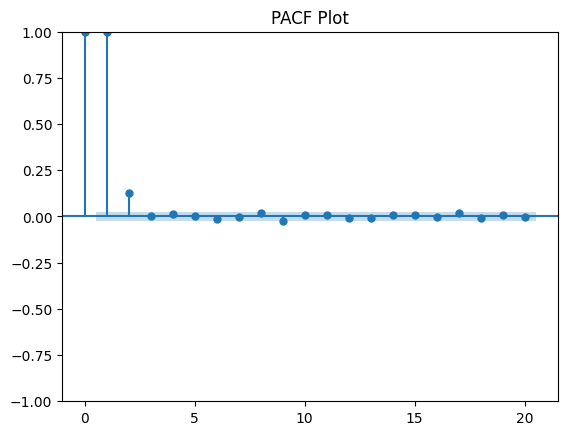

In [ ]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Step 1: ACF and PACF plots
plt.figure(figsize=(12, 6))
plot_acf(data['Ex_rate'], lags=20)
plt.title('ACF Plot')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(data['Ex_rate'], lags=20)
plt.title('PACF Plot')
plt.show()


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Step 1: Load the dataset
data = pd.read_csv("/content/exchange_rate.csv", parse_dates=['date'], dayfirst=True)

# Step 2: Ensure both columns are loaded correctly
print(data.head())  # Check the first few rows
print(data.columns)  # Confirm column names

# Set 'date' as the index and specify the frequency
if 'date' in data.columns:
    data.set_index('date', inplace=True)
    data = data.asfreq('D')  # Set frequency to daily
else:
    print("Column 'date' not found in the dataset.")

# Check for missing values
print(data.isnull().sum())  # Check for missing values
data.ffill(inplace=True)  # Forward fill for missing values

# Step 3: Model Fitting
model_arima = ARIMA(data['Ex_rate'], order=(1, 1, 1))  # Adjust (p, d, q) based on ACF/PACF
model_fit_arima = model_arima.fit()

# Display model summary
print(model_fit_arima.summary())


        date  Ex_rate
0 1990-01-01   0.7855
1 1990-01-02   0.7818
2 1990-01-03   0.7867
3 1990-01-04   0.7860
4 1990-01-05   0.7849
Index(['date', 'Ex_rate'], dtype='object')
Ex_rate    0
dtype: int64
                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Wed, 09 Oct 2024   AIC                         -56102.322
Time:                        11:08:30   BIC                         -56081.519
Sample:                    01-01-1990   HQIC                        -56095.182
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1    

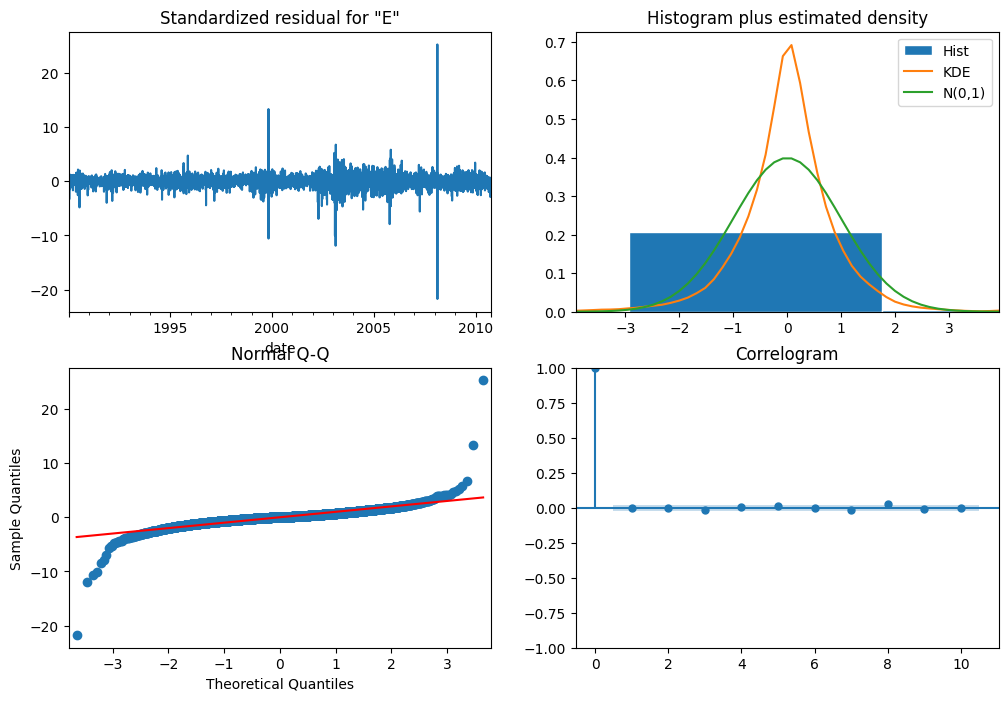

In [13]:
# Step 1: ARIMA Diagnostics
model_fit_arima.plot_diagnostics(figsize=(12, 8))
plt.show()


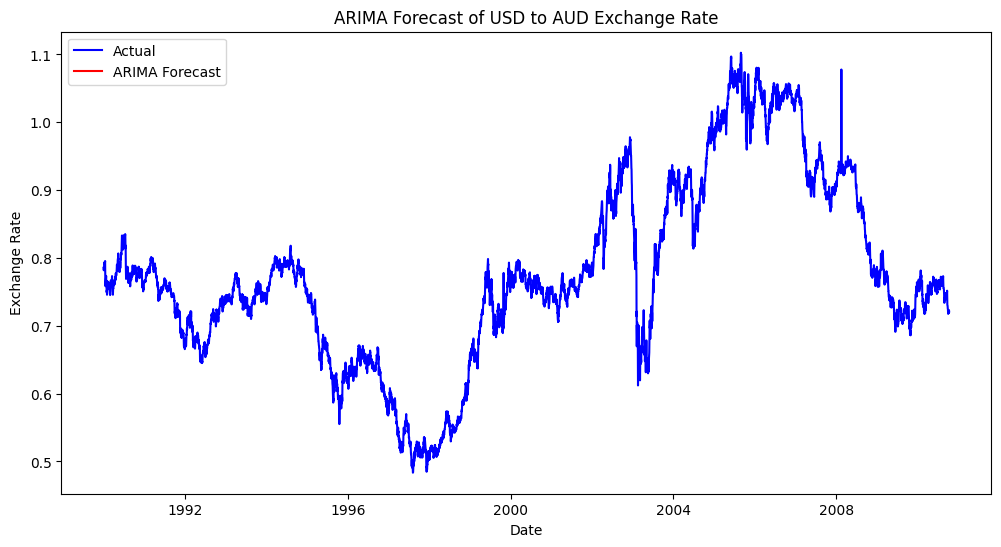

In [14]:
# Step 2: Forecasting
forecast_arima = model_fit_arima.forecast(steps=12)  # Forecast the next 12 periods

# Create a DataFrame for the forecasted values
forecast_index = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=12, freq='D')
forecast_df = pd.DataFrame(forecast_arima, index=forecast_index, columns=['Forecast'])

# Plot actual vs forecast
plt.figure(figsize=(12, 6))
plt.plot(data['Ex_rate'], label='Actual', color='blue')
plt.plot(forecast_df, label='ARIMA Forecast', color='red')
plt.title('ARIMA Forecast of USD to AUD Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


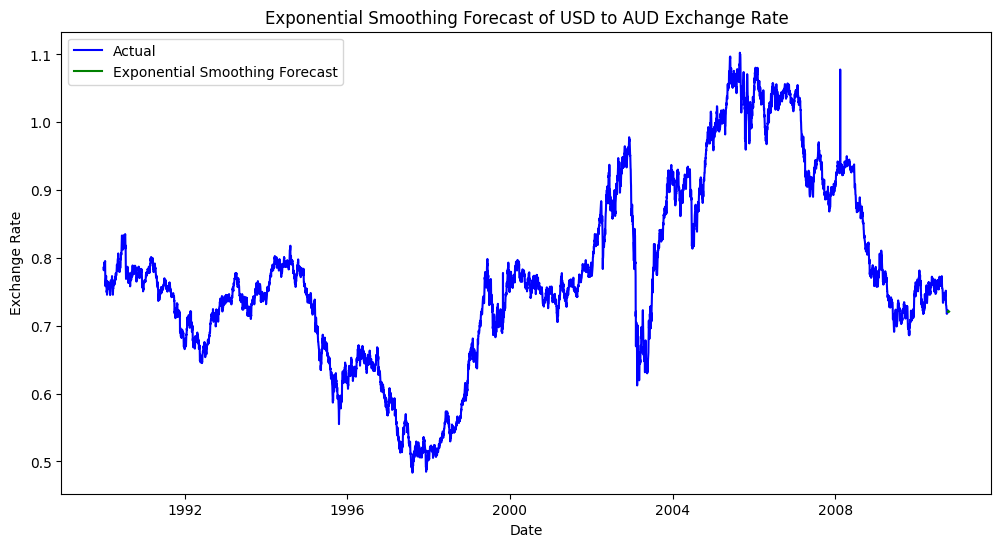

In [15]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Step 1: Model Selection and Fitting
model_exp_smooth = ExponentialSmoothing(data['Ex_rate'], seasonal='add', seasonal_periods=12)
model_fit_exp_smooth = model_exp_smooth.fit()

# Step 2: Forecasting
forecast_exp_smooth = model_fit_exp_smooth.forecast(steps=12)  # Forecast next 12 periods

# Create a DataFrame for the Exponential Smoothing forecasted values
forecast_exp_df = pd.DataFrame(forecast_exp_smooth, index=forecast_index, columns=['Forecast'])

# Plot actual vs forecast for Exponential Smoothing
plt.figure(figsize=(12, 6))
plt.plot(data['Ex_rate'], label='Actual', color='blue')
plt.plot(forecast_exp_df, label='Exponential Smoothing Forecast', color='green')
plt.title('Exponential Smoothing Forecast of USD to AUD Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()
